# 과제 : K-means와 DBSCAN 비교


아래 데이터셋을 활용하여 클러스터링을 하려고 합니다.
코드의 빈칸을 채우시고, 주관식 문제에 답해주세요.

## 데이터셋 불러오기 및 시각화

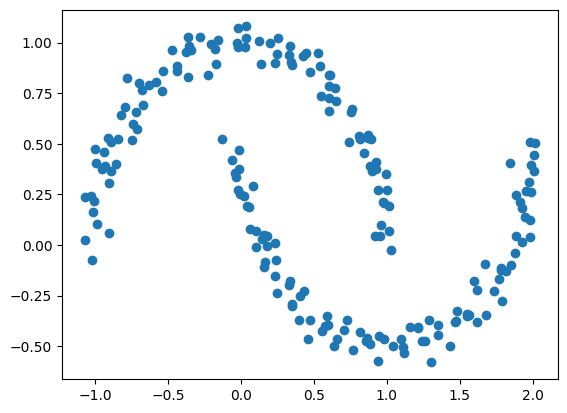

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

x, y = make_moons(n_samples = 200, shuffle = True, noise = 0.05, random_state = 0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

km = KMeans(n_clusters = 2, random_state = 0)
pred1 = km.fit_predict(x)

## K-means 클러스터링

### Elbow method

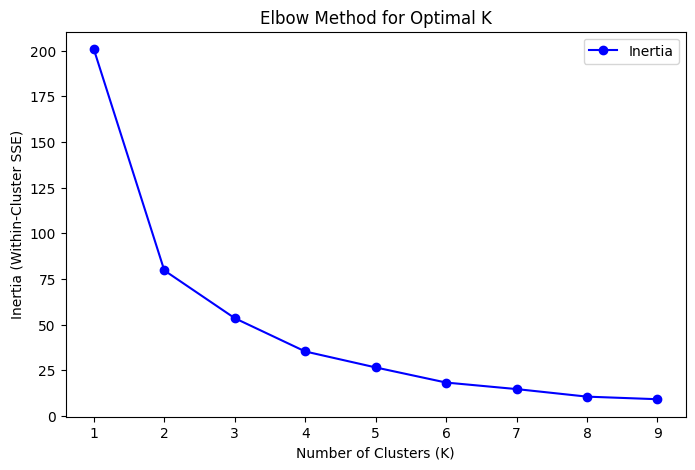

In [2]:
# 엘보우 메소드 시각화
inertia_values = []
silhouette_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    inertia_values.append(km.inertia_)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue', label="Inertia")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Inertia (Within-Cluster SSE)")
ax1.set_title("Elbow Method for Optimal K")
ax1.legend()
plt.show()

### 문제 1
**엘보우 메소드를 바탕으로, 최적의 K값을 설정하여 코드의 빈칸을 채운 후, 판단 근거를 서술하세요.**

In [3]:
# 3️⃣ 최적의 K값 선택 (엘보우 지점)
optimal_k = 2  # 엘보우 메소드에서 꺾이는 지점을 선택

### 결과

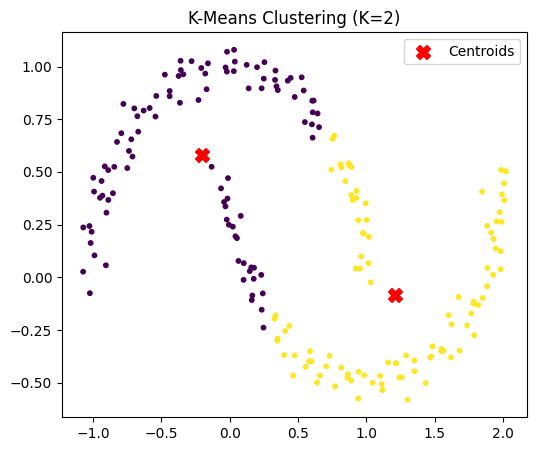

In [ ]:
# K-Means 클러스터링 실행
km = KMeans(n_clusters=optimal_k, random_state=0)
pred_kmeans = km.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_kmeans, cmap='viridis', s=10)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


## DBSACN

### 문제 2
**eps와 min_samlpes의 개념을 이해한 후, 이 둘을 조절하여 실행해보며 아래 사진과 같은 군집을 형성하세요.**

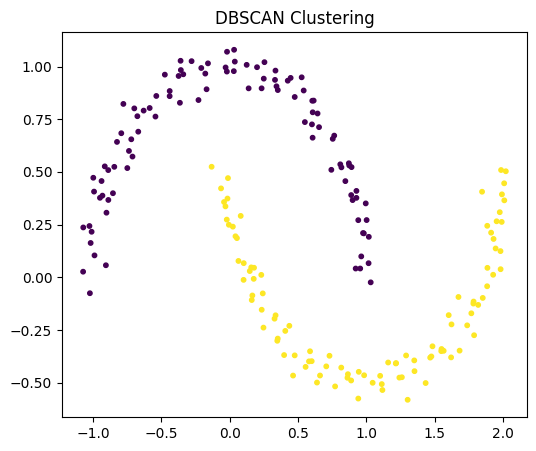

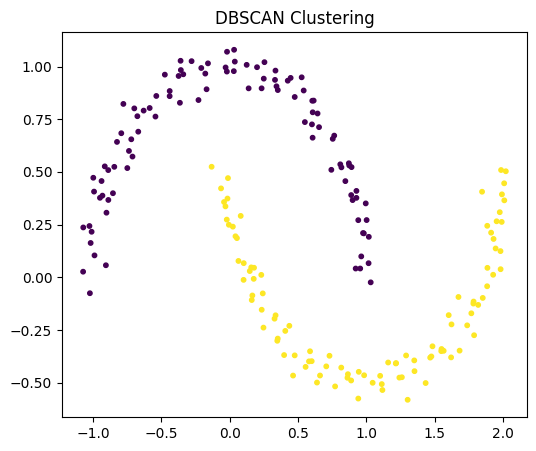

In [ ]:
# DBSCAN 클러스터링 실행
dbscan = DBSCAN(eps=0.2, min_samples=5)
pred_dbscan = dbscan.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.show()


## 반경 eps 내에 min_samples 개수 이상의 점이 있으면, 그 점을 핵심 점으로 간주하고 클러스터를 확장

### 문제 3
**eps와 min_samples가 너무 크거나 작을 때, 왜 상식적인 군집화가 이루어지지 않았을까요?**

총 경우의 수는 eps/min_samples가 크고/작을 때로 4가지가 있다.
데이터 셋에 따라 같은 조합이여도 결과가 다르므로 파라미터 한 개의 변화만 살펴보자.

Case1) eps가 클 때, 멀리 떨어진 점들까지 하나의 클러스터로 묶여 같은 색깔을 배정 받음
 
Case2) eps가 작을 때, min_sample만큼의 이웃을 찾지 못해 클러스터 형성이 불가능 할듯

Case3) min_sample이 클 때, 한 클러스터를 만들기 위한 수이므로 대부분 이상치로 처리될듯

Case4) min_sample이 작을 때, 이상치까지 포함한 잘못된 클러스터가 많이 생성될 듯

### 문제 4
**K-means의 결과와, DBSCAN의 결과가 다른 이유를 특징을 포함하여 서술하세요.**


K-means는 중심점을 기준으로 클러스터를 형성하니까 각 데이터 포인트를 가장 가까운 중심에 할당한다. 게다가 '거리 기반' 알고리즘이므로 구형 클러스터를 가정하고 있어서 분리의 한계가 있음.

하지만 DBSCAN은 밀도 기반 클러스터링이다. 특정 밀도를 가진 지역을 하나의 클러스터로 간주하니까 데이터 분포에 덜 민감할 것 같음. 게다가 클러스터 개수도 하이퍼 파라미터로 주어지지 않으니 보다 정확한 클러스터링이 가능한듯.